<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praca domowa nr 3**

-------------------------------

1.Wczytujemy przykładowy dataset. Dane, które posłużoną nam jako przykład do dane WDBC. Dane te zawierają charakterystyki opisujące obrazy jąder komórkowych pobranych z guza znalezionego w piersi kobiet poddawanych badaniu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)

url = 'https://raw.githubusercontent.com/chillMLguy/ML24-25L/refs/heads/main/wdbc.data'
data = pd.read_csv(url)
data = data.iloc[:,1:]
data.columns = ["diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","SE_radius","SE_texture","SE_perimeter","SE_area","SE_smoothness","SE_compactness","SE_concavity","SE_concave_points","SE_symmetry","SE_fractal_dimension","worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]

data["diagnosis"] = data["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)

data.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal Threshold: 0.2706


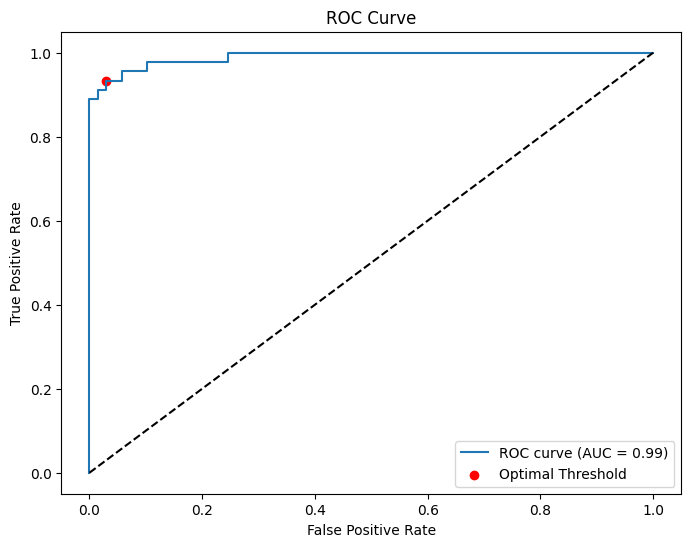

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

#dziele na zbiory test, val i train
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#skalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict Probabilities on Validation Set
y_probs = model.predict_proba(X_val)[:, 1]

# Compute ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Determine Optimal Threshold (Youden's J Statistic)
youden_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[youden_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.scatter(fpr[youden_index], tpr[youden_index], color='red', label='Optimal Threshold')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
